### LSE Data Analytics Online Career Accelerator 

# DA301:  Advanced Analytics for Organisational Impact

## Assignment template

### Scenario
You are a data analyst working for Turtle Games, a game manufacturer and retailer. They manufacture and sell their own products, along with sourcing and selling products manufactured by other companies. Their product range includes books, board games, video games and toys. They have a global customer base and have a business objective of improving overall sales performance by utilising customer trends. In particular, Turtle Games wants to understand: 
- how customers accumulate loyalty points (Week 1)
- how useful are remuneration and spending scores data (Week 2)
- can social data (e.g. customer reviews) be used in marketing campaigns (Week 3)
- what is the impact on sales per product (Week 4)
- the reliability of the data (e.g. normal distribution, Skewness, Kurtosis) (Week 5)
- if there is any possible relationship(s) in sales between North America, Europe, and global sales (Week 6).

# Week 1 assignment: Linear regression using Python
The marketing department of Turtle Games prefers Python for data analysis. As you are fluent in Python, they asked you to assist with data analysis of social media data. The marketing department wants to better understand how users accumulate loyalty points. Therefore, you need to investigate the possible relationships between the loyalty points, age, remuneration, and spending scores. Note that you will use this data set in future modules as well and it is, therefore, strongly encouraged to first clean the data as per provided guidelines and then save a copy of the clean data for future use.

## Instructions
1. Load and explore the data.
    1. Create a new DataFrame (e.g. reviews).
    2. Sense-check the DataFrame.
    3. Determine if there are any missing values in the DataFrame.
    4. Create a summary of the descriptive statistics.
2. Remove redundant columns (`language` and `platform`).
3. Change column headings to names that are easier to reference (e.g. `renumeration` and `spending_score`).
4. Save a copy of the clean DataFrame as a CSV file. Import the file to sense-check.
5. Use linear regression and the `statsmodels` functions to evaluate possible linear relationships between loyalty points and age/renumeration/spending scores to determine whether these can be used to predict the loyalty points.
    1. Specify the independent and dependent variables.
    2. Create the OLS model.
    3. Extract the estimated parameters, standard errors, and predicted values.
    4. Generate the regression table based on the X coefficient and constant values.
    5. Plot the linear regression and add a regression line.
6. Include your insights and observations.

## 1. Load and explore the data

In [1]:
# Imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm 
from statsmodels.formula.api import ols

In [2]:
# Load the CSV file(s) as reviews.
reviews = pd.read_csv('turtle_reviews.csv')

# View the DataFrame.
reviews.head() 
reviews.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 11 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   gender                  2000 non-null   object 
 1   age                     2000 non-null   int64  
 2   remuneration (k£)       2000 non-null   float64
 3   spending_score (1-100)  2000 non-null   int64  
 4   loyalty_points          2000 non-null   int64  
 5   education               2000 non-null   object 
 6   language                2000 non-null   object 
 7   platform                2000 non-null   object 
 8   product                 2000 non-null   int64  
 9   review                  2000 non-null   object 
 10  summary                 2000 non-null   object 
dtypes: float64(1), int64(4), object(6)
memory usage: 172.0+ KB


In [3]:
# Any missing values?
# Replace the missing values with 0.
reviews.fillna(0, inplace=True)

# Determine the number of missing values.
reviews.isna().sum()

gender                    0
age                       0
remuneration (k£)         0
spending_score (1-100)    0
loyalty_points            0
education                 0
language                  0
platform                  0
product                   0
review                    0
summary                   0
dtype: int64

In [4]:
# Explore the data.
# Descriptive statistics
reviews.describe()

,age,remuneration (k£),spending_score (1-100),loyalty_points,product
count,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,39.495000,48.079060,50.000000,1578.032000,4320.521500
std,13.573212,23.123984,26.094702,1283.239705,3148.938839
min,17.000000,12.300000,1.000000,25.000000,107.000000
25%,29.000000,30.340000,32.000000,772.000000,1589.250000
50%,38.000000,47.150000,50.000000,1276.000000,3624.000000
75%,49.000000,63.960000,73.000000,1751.250000,6654.000000
max,72.000000,112.340000,99.000000,6847.000000,11086.000000


### Descriptive statistics Summary.


## 2. Drop columns

In [5]:
# Drop unnecessary columns.
reviews_new = reviews.drop(['language', 'platform'],
                       axis=1)

# View column names.
reviews_new.head()

,gender,age,remuneration (k£),spending_score (1-100),loyalty_points,education,product,review,summary
0,Male,18,12.30,39,210,graduate,453,"When it comes to a DM's screen, the space on t...",The fact that 50% of this space is wasted on a...
1,Male,23,12.30,81,524,graduate,466,An Open Letter to GaleForce9*:\n\nYour unpaint...,Another worthless Dungeon Master's screen from...
2,Female,22,13.12,6,40,graduate,254,"Nice art, nice printing. Why two panels are f...","pretty, but also pretty useless"
3,Female,25,13.12,77,562,graduate,263,Amazing buy! Bought it as a gift for our new d...,Five Stars
4,Female,33,13.94,40,366,graduate,291,As my review of GF9's previous screens these w...,Money trap


## 3. Rename columns

In [6]:
# Rename the column headers.
reviews_new.rename(columns={'remuneration (k£)': 'renumeration',
                            'spending_score (1-100)': 'spending_score'}, inplace = True)

# View column names.
reviews_new.head()

,gender,age,renumeration,spending_score,loyalty_points,education,product,review,summary
0,Male,18,12.30,39,210,graduate,453,"When it comes to a DM's screen, the space on t...",The fact that 50% of this space is wasted on a...
1,Male,23,12.30,81,524,graduate,466,An Open Letter to GaleForce9*:\n\nYour unpaint...,Another worthless Dungeon Master's screen from...
2,Female,22,13.12,6,40,graduate,254,"Nice art, nice printing. Why two panels are f...","pretty, but also pretty useless"
3,Female,25,13.12,77,562,graduate,263,Amazing buy! Bought it as a gift for our new d...,Five Stars
4,Female,33,13.94,40,366,graduate,291,As my review of GF9's previous screens these w...,Money trap


## 4. Save the DataFrame as a CSV file

In [7]:
# Create a CSV file as output.
reviews_new.to_csv('reviews_new.csv',index=False)

In [8]:
# Import new CSV file with Pandas.
reviews_final = pd.read_csv('reviews_new.csv')

# View DataFrame.
reviews_final.head()


,gender,age,renumeration,spending_score,loyalty_points,education,product,review,summary
0,Male,18,12.30,39,210,graduate,453,"When it comes to a DM's screen, the space on t...",The fact that 50% of this space is wasted on a...
1,Male,23,12.30,81,524,graduate,466,An Open Letter to GaleForce9*:\n\nYour unpaint...,Another worthless Dungeon Master's screen from...
2,Female,22,13.12,6,40,graduate,254,"Nice art, nice printing. Why two panels are f...","pretty, but also pretty useless"
3,Female,25,13.12,77,562,graduate,263,Amazing buy! Bought it as a gift for our new d...,Five Stars
4,Female,33,13.94,40,366,graduate,291,As my review of GF9's previous screens these w...,Money trap


In [9]:
reviews_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   gender          2000 non-null   object 
 1   age             2000 non-null   int64  
 2   renumeration    2000 non-null   float64
 3   spending_score  2000 non-null   int64  
 4   loyalty_points  2000 non-null   int64  
 5   education       2000 non-null   object 
 6   product         2000 non-null   int64  
 7   review          2000 non-null   object 
 8   summary         2000 non-null   object 
dtypes: float64(1), int64(4), object(4)
memory usage: 140.8+ KB


## 5. Linear regression

### 5a) spending vs loyalty

In [10]:
# Define the dependent variable y.
y = reviews_final['loyalty_points'].values.reshape(-1, 1) 

# Define the independent variable x.
x = reviews_final['spending_score'].values.reshape(-1, 1) 


# OLS model and summary.
f = 'y ~ x'
test = ols(f, data = reviews_final).fit()

# Print the regression table.
test.summary() 

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.452
Model:                            OLS   Adj. R-squared:                  0.452
Method:                 Least Squares   F-statistic:                     1648.
Date:                Wed, 07 Dec 2022   Prob (F-statistic):          2.92e-263
Time:                        14:47:11   Log-Likelihood:                -16550.
No. Observations:                2000   AIC:                         3.310e+04
Df Residuals:                    1998   BIC:                         3.312e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -75.0527     45.931     -1.634      0.102    -165.129      15.024
x             33.0617      0.814     40.595      0.000      31.464      34.659
==============================================================================
Omnibus:                      126.554   Durbin-Watson:                   1.191
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              260.528
Skew:                           0.422   Prob(JB):                     2.67e-57
Kurtosis:                       4.554   Cond. No.                         122.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

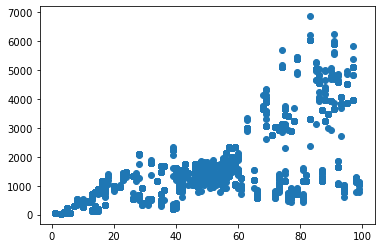

In [11]:
# Check for linearity with Matplotlib.
plt.scatter(x, y)


In [12]:
# Extract the estimated parameters.
print("Parameters: ", test.params)  

# Extract the standard errors.
print("Standard errors: ", test.bse)   

# Extract the predicted values.
print("Predicted values: ", test.predict())

Parameters:  Intercept   -75.052663
x            33.061693
dtype: float64
Standard errors:  Intercept    45.930554
x             0.814419
dtype: float64
Predicted values:  [1214.35337415 2602.94449102  123.31749662 ... 2933.56142361  453.93442921
  189.44088314]


In [13]:
# Set the X coefficient and the constant to generate the regression table.
# y_pred = B0 + B1
y_pred = (-75.052663) + 33.061693 * reviews_final['spending_score']

# View the output.
y_pred

0       1214.353364
1       2602.944470
2        123.317495
3       2470.697698
4       1247.415057
           ...     
1995    2206.204154
1996     189.440881
1997    2933.561400
1998     453.934425
1999     189.440881
Name: spending_score, Length: 2000, dtype: float64

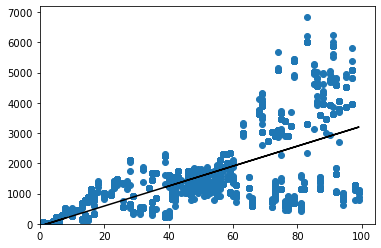

In [14]:
# Plot the graph with a regression line.
# Plot the data points with a scatterplot.
plt.scatter(x, y)

# Plot the regression line (in black).
plt.plot(x, y_pred, color='black')

# Set the x and y limits on the axes.
plt.xlim(0)
plt.ylim(0)

# View the plot.
plt.show()

### 5b) renumeration vs loyalty

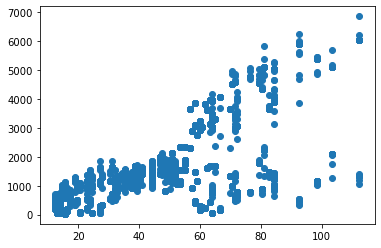

In [15]:
# Independent variable.
x = reviews_final['renumeration'] 

# Dependent variable.
y = reviews_final['loyalty_points'] 

# Check for linearity with Matplotlib.
plt.scatter(x, y)

In [16]:
# OLS model and summary.
# Create formula and pass through OLS methods.
f = 'y ~ x'
test = ols(f, data = reviews_final).fit()

# Print the regression table.
test.summary() 

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.380
Model:                            OLS   Adj. R-squared:                  0.379
Method:                 Least Squares   F-statistic:                     1222.
Date:                Wed, 07 Dec 2022   Prob (F-statistic):          2.43e-209
Time:                        14:47:12   Log-Likelihood:                -16674.
No. Observations:                2000   AIC:                         3.335e+04
Df Residuals:                    1998   BIC:                         3.336e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -65.6865     52.171     -1.259      0.208    -168.001      36.628
x             34.1878      0.978     34.960      0.000      32.270      36.106
==============================================================================
Omnibus:                       21.285   Durbin-Watson:                   3.622
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               31.715
Skew:                           0.089   Prob(JB):                     1.30e-07
Kurtosis:                       3.590   Cond. No.                         123.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [17]:
# Extract the estimated parameters.
print("Parameters: ", test.params) 

# Extract the standard errors.
print("Standard errors: ", test.bse)

# Extract the predicted values.
print("Predicted values: ", test.predict())  

Parameters:  Intercept   -65.686513
x            34.187825
dtype: float64
Standard errors:  Intercept    52.170717
x             0.977925
dtype: float64
Predicted values:  [ 354.82374068  354.82374068  382.85775758 ... 3102.15739671 3298.39551499
 3102.15739671]


In [18]:
# Set the the X coefficient and the constant to generate the regression table.
# Set the the coefficient to 34.187825 and the constant to -65.686513
y_pred = (-65.686513) + 34.187825 * reviews_final['renumeration']

# View the output.
y_pred

0        354.823735
1        354.823735
2        382.857751
3        382.857751
4        410.891767
           ...     
1995    2821.817186
1996    3102.157351
1997    3102.157351
1998    3298.395467
1999    3102.157351
Name: renumeration, Length: 2000, dtype: float64

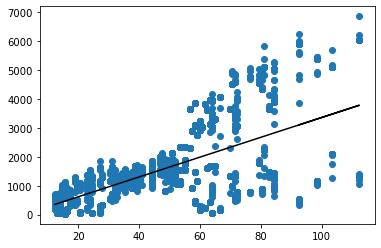

In [19]:
# Plot graph with regression line.
# Plot the data points with a scatterplot.
plt.scatter(x, y)

# Plot the regression line (in black).
plt.plot(x, y_pred, color='black')

### 5c) age vs loyalty

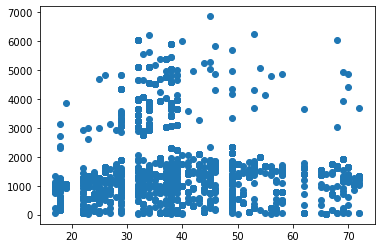

In [20]:
# Independent variable.
x = reviews_final['age'] 

# Dependent variable.
y = reviews_final['loyalty_points'] 

# Check for linearity with Matplotlib.
plt.scatter(x, y)


In [21]:
# OLS model and summary.
# Create formula and pass through OLS methods.
f = 'y ~ x'
test = ols(f, data = reviews_final).fit()

# Print the regression table.
test.summary() 

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.002
Model:                            OLS   Adj. R-squared:                  0.001
Method:                 Least Squares   F-statistic:                     3.606
Date:                Wed, 07 Dec 2022   Prob (F-statistic):             0.0577
Time:                        14:47:13   Log-Likelihood:                -17150.
No. Observations:                2000   AIC:                         3.430e+04
Df Residuals:                    1998   BIC:                         3.431e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   1736.5177     88.249     19.678      0.000    1563.449    1909.587
x             -4.0128      2.113     -1.899      0.058      -8.157       0.131
==============================================================================
Omnibus:                      481.477   Durbin-Watson:                   2.277
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              937.734
Skew:                           1.449   Prob(JB):                    2.36e-204
Kurtosis:                       4.688   Cond. No.                         129.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [22]:
# Extract the estimated parameters.
print("Parameters: ", test.params) 

# Extract the standard errors.
print("Standard errors: ", test.bse)

# Extract the predicted values.
print("Predicted values: ", test.predict())  


Parameters:  Intercept    1736.517739
x              -4.012805
dtype: float64
Standard errors:  Intercept    88.248731
x             2.113177
dtype: float64
Predicted values:  [1664.2872467  1644.22322095 1648.2360261  ... 1600.0823643  1600.0823643
 1608.1079746 ]


In [23]:
# Set the the X coefficient and the constant to generate the regression table.
# Set the the coefficient to -4.012805 and the constant to 1736.517739
y_pred = 1736.517739 + (-4.012805) * reviews_final['age']

# View the output.
y_pred


0       1664.287249
1       1644.223224
2       1648.236029
3       1636.197614
4       1604.095174
           ...     
1995    1588.043954
1996    1563.967124
1997    1600.082369
1998    1600.082369
1999    1608.107979
Name: age, Length: 2000, dtype: float64

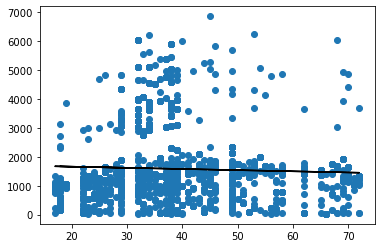

In [24]:
# Plot graph with regression line.
# Plot the data points with a scatterplot.
plt.scatter(x, y)

# Plot the regression line (in black).
plt.plot(x, y_pred, color='black')

## 6. Observations and insights

Spending Scores
45% of loyalty points can be explained by spending scores.

If spending scores changes by one unit, loyalty points changes by 33 points.

95% of the samples will derive a slope within the interval 31.464 and 34.659

Probability of t-value is 0, so slope is significant.


Renumeration
38% of loyalty points can be explained by earnings.

If earnings changes by one unit, loyalty points changes by 33 points.

95% of the samples will derive a slope within the interval 32.270 and 36.106

Probability of t-value is 0, so slope is significant.


Age 
Age is not a useful variable to determine the number of loyalty points.

It would be useful to see if using a multiple linear regression would offer more accurate insights.  I would combine spending scores and renumeration.



### Multiple linear regressions - additional


In [25]:
# import the required libraries
import statsmodels.api as sm
from sklearn import datasets 
import numpy as np
from sklearn import linear_model
import pandas as pd
from statsmodels.stats.outliers_influence import variance_inflation_factor
import sklearn
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

# Note: Indicates situations that aren’t necessarily exceptions.
import warnings  
warnings.filterwarnings('ignore') 

In [26]:
# Define the dependent variable.
y = reviews_final['loyalty_points']  

# Define the independent variable.
X = reviews_final[['renumeration','spending_score']] 

In [27]:
# MLR - multiple linear regression - used when there is more than one independent variable
# Fit the regression model.
mlr = linear_model.LinearRegression()
mlr.fit(X, y) 

LinearRegression()

In [28]:
# Call the predictions for X (array).
mlr.predict(X) 

array([ 4.57831319e-01,  1.38195101e+03, -1.05713790e+03, ...,
        4.44147048e+03,  2.16956070e+03,  1.71137682e+03])

In [29]:
# Print the R-squared value.
print("R-squared: ", mlr.score(X,y))  

# Print the intercept.
print("Intercept: ", mlr.intercept_) 

# Print the coefficients.
print("Coefficients:")  

# Map a similar index of multiple containers (to be used as a single entity).
list(zip(X, mlr.coef_)) 

R-squared:  0.826913470198926
Intercept:  -1700.3050970144361
Coefficients:


[('renumeration', 33.97949882180282), ('spending_score', 32.89269468782098)]

## 6. Observations and insights

82.7% of loyalty points can be explained by renumeration and spending scores. 

# 

# Week 2 assignment: Clustering with *k*-means using Python

The marketing department also wants to better understand the usefulness of renumeration and spending scores but do not know where to begin. You are tasked to identify groups within the customer base that can be used to target specific market segments. Use *k*-means clustering to identify the optimal number of clusters and then apply and plot the data using the created segments.

## Instructions
1. Prepare the data for clustering. 
    1. Import the CSV file you have prepared in Week 1.
    2. Create a new DataFrame (e.g. `df2`) containing the `renumeration` and `spending_score` columns.
    3. Explore the new DataFrame. 
2. Plot the renumeration versus spending score.
    1. Create a scatterplot.
    2. Create a pairplot.
3. Use the Silhouette and Elbow methods to determine the optimal number of clusters for *k*-means clustering.
    1. Plot both methods and explain how you determine the number of clusters to use.
    2. Add titles and legends to the plot.
4. Evaluate the usefulness of at least three values for *k* based on insights from the Elbow and Silhoutte methods.
    1. Plot the predicted *k*-means.
    2. Explain which value might give you the best clustering.
5. Fit a final model using your selected value for *k*.
    1. Justify your selection and comment on the respective cluster sizes of your final solution.
    2. Check the number of observations per predicted class.
6. Plot the clusters and interpret the model.

## 1. Load and explore the data

In [30]:
# Import necessary libraries.
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.metrics import accuracy_score
from scipy.spatial.distance import cdist

import warnings
warnings.filterwarnings('ignore')

In [31]:
# Load the CSV file(s) 
df = pd.read_csv('reviews_new.csv')

# View DataFrame.
df.head()

,gender,age,renumeration,spending_score,loyalty_points,education,product,review,summary
0,Male,18,12.30,39,210,graduate,453,"When it comes to a DM's screen, the space on t...",The fact that 50% of this space is wasted on a...
1,Male,23,12.30,81,524,graduate,466,An Open Letter to GaleForce9*:\n\nYour unpaint...,Another worthless Dungeon Master's screen from...
2,Female,22,13.12,6,40,graduate,254,"Nice art, nice printing. Why two panels are f...","pretty, but also pretty useless"
3,Female,25,13.12,77,562,graduate,263,Amazing buy! Bought it as a gift for our new d...,Five Stars
4,Female,33,13.94,40,366,graduate,291,As my review of GF9's previous screens these w...,Money trap


In [32]:
# Drop unnecessary columns.
# rename as df2
# keep columns remuneration and spending_score 
df2 = df.drop(['age', 'education','review','summary','product','gender'],
                       axis=1)

# View DataFrame.
df2.head()

,renumeration,spending_score,loyalty_points
0,12.30,39,210
1,12.30,81,524
2,13.12,6,40
3,13.12,77,562
4,13.94,40,366


In [33]:
# Explore the data.
df2.isnull().sum()

renumeration      0
spending_score    0
loyalty_points    0
dtype: int64

In [34]:
# Descriptive statistics.
df2.describe()

,renumeration,spending_score,loyalty_points
count,2000.000000,2000.000000,2000.000000
mean,48.079060,50.000000,1578.032000
std,23.123984,26.094702,1283.239705
min,12.300000,1.000000,25.000000
25%,30.340000,32.000000,772.000000
50%,47.150000,50.000000,1276.000000
75%,63.960000,73.000000,1751.250000
max,112.340000,99.000000,6847.000000


## 2. Plot

<AxesSubplot:xlabel='spending_score', ylabel='loyalty_points'>

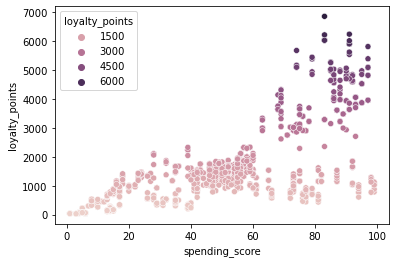

In [35]:
# Create a scatterplot with Seaborn.
sns.scatterplot(x='spending_score',
                y='loyalty_points',
                data=df2,
                hue='loyalty_points')


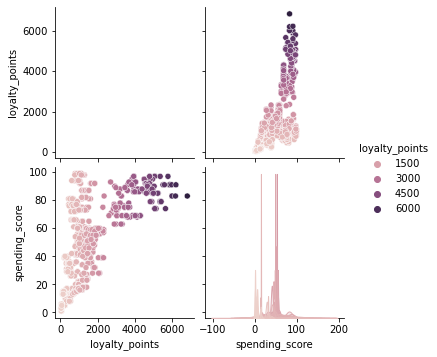

In [36]:
# Create a pairplot with Seaborn.
x = df2[['loyalty_points', 'spending_score']]

sns.pairplot(df2,
             vars=x,
             hue='loyalty_points',
             diag_kind='kde')

## 3. Elbow and silhoutte methods

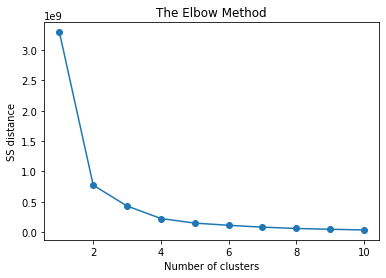

In [37]:
# Determine the number of clusters: Elbow method.
# Import the KMeans class.
from sklearn.cluster import KMeans 

# Elbow chart for us to decide on the number of optimal clusters.
#  Ss stands for sum of squares
ss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i,
                    init='k-means++',
                    max_iter=300,
                    n_init=10,
                    random_state=0)
    kmeans.fit(x)
    ss.append(kmeans.inertia_)

# Plot the elbow method.
plt.plot(range(1, 11),
         ss,
         marker='o')

# Insert labels and title.
plt.title("The Elbow Method")
plt.xlabel("Number of clusters")
plt.ylabel("SS distance")

plt.show()

## Comments

According to the Elbow method the optimum number of clusters is 4.  

The fewer clusters we have the greater the data reduction achieved.
there is a trade off.  e.g. if  you only had one cluster you are treating all records objects as one
greater number of clusters less data reduction , but also means a greater homogeneity (i.e. greater similarity of objects within those clusters)

The compromise is at the elbow

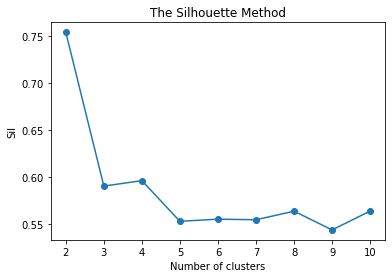

In [38]:
# Determine the number of clusters: Silhouette method.
# Import silhouette_score class from sklearn.
from sklearn.metrics import silhouette_score

# Find the range of clusters to be used using silhouette method.
sil = []
kmax = 10

for k in range(2, kmax+1):
    kmeans_s = KMeans(n_clusters=k).fit(x)
    labels = kmeans_s.labels_
    sil.append(silhouette_score(x,
                                labels,
                                metric='euclidean'))

# Plot the silhouette method.
plt.plot(range(2, kmax+1),
         sil,
         marker='o')

# Insert labels and title.
plt.title("The Silhouette Method")
plt.xlabel("Number of clusters")
plt.ylabel("Sil")

plt.show()

## comments

Silhouette method also states 4 number of clusters

## 4. Evaluate k-means model at different values of *k*

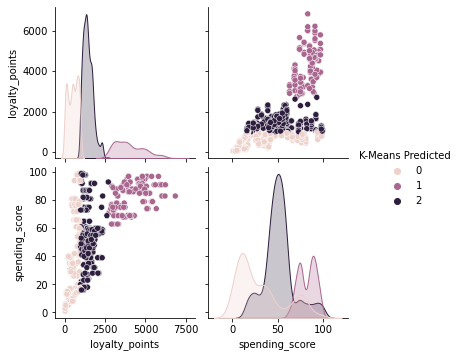

In [39]:
# Evaluate the K-means model when k = 3
kmeans = KMeans(n_clusters = 3, 
                max_iter = 15000,
                init='k-means++',
                random_state=0).fit(x)

clusters = kmeans.labels_

x['K-Means Predicted'] = clusters

# Plot the predicted.
sns.pairplot(x,
             hue='K-Means Predicted',
             diag_kind= 'kde')

In [40]:
# Check the number of observations per predicted class.
# shows the number of objects within each cluster
x['K-Means Predicted'].value_counts()

2    977
0    671
1    352
Name: K-Means Predicted, dtype: int64

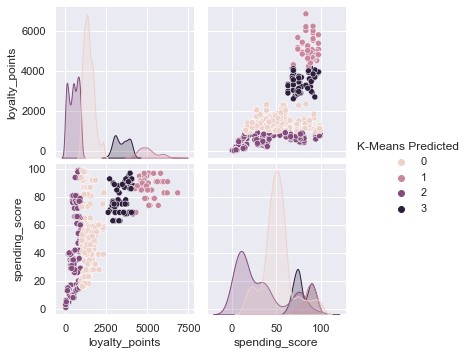

In [85]:
# Evaluate the K-means model when k = 4
kmeans = KMeans(n_clusters = 4, 
                max_iter = 15000,
                init='k-means++',
                random_state=0).fit(x)

clusters = kmeans.labels_

x['K-Means Predicted'] = clusters

# Plot the predicted.
sns.pairplot(x,
             hue='K-Means Predicted',
             diag_kind= 'kde')

In [86]:
# Check the number of observations per predicted class.
# shows the number of objects within each cluster
x['K-Means Predicted'].value_counts()

0    994
2    652
3    230
1    124
Name: K-Means Predicted, dtype: int64

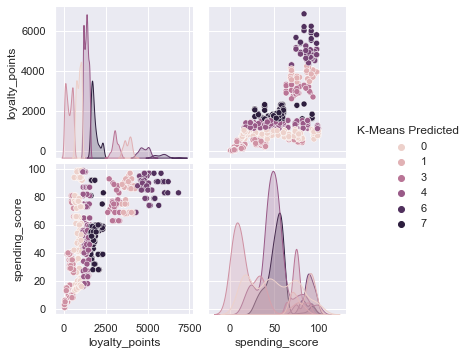

In [87]:
# Evaluate the K-means model when k = 8
kmeans = KMeans(n_clusters = 8, 
                max_iter = 15000,
                init='k-means++',
                random_state=0).fit(x)

clusters = kmeans.labels_

x['K-Means Predicted'] = clusters

# Plot the predicted.
sns.pairplot(x,
             hue='K-Means Predicted',
             diag_kind= 'kde')

In [88]:
# Check the number of observations per predicted class.
# shows the number of objects within each cluster
x['K-Means Predicted'].value_counts()

4    564
0    399
2    393
7    290
1    119
3    112
5     90
6     33
Name: K-Means Predicted, dtype: int64

## 5. Fit final model and justify your choice

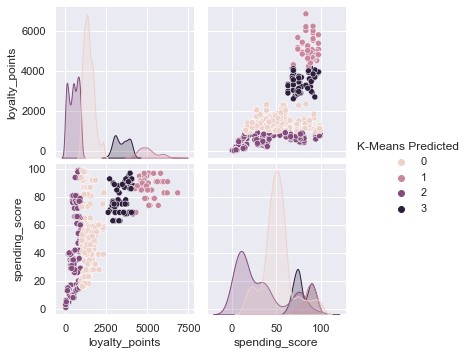

In [81]:
# Apply the final model.
# Evaluate the K-means model when k = 4
kmeans = KMeans(n_clusters = 4, 
                max_iter = 15000,
                init='k-means++',
                random_state=0).fit(x)

clusters = kmeans.labels_

x['K-Means Predicted'] = clusters

# Plot the predicted.
sns.pairplot(x,
             hue='K-Means Predicted',
             diag_kind= 'kde')

In [82]:
# Check the number of observations per predicted class.
x['K-Means Predicted'].value_counts()

0    994
2    652
3    230
1    124
Name: K-Means Predicted, dtype: int64

## 6. Plot and interpret the clusters

<AxesSubplot:xlabel='spending_score', ylabel='loyalty_points'>

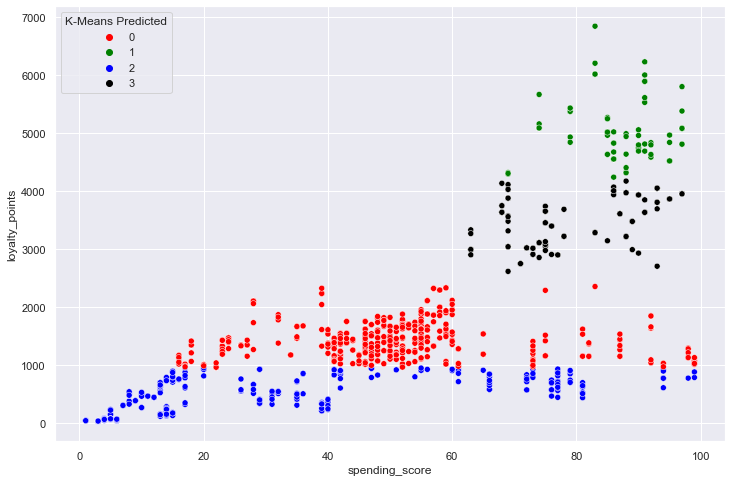

In [83]:
# Visualising the clusters.
# Set plot size.
sns.set(rc = {'figure.figsize':(12, 8)})

# Create a scatterplot.
sns.scatterplot(x='spending_score' , 
                y ='loyalty_points',
                data=x,
                hue='K-Means Predicted',
                palette=['red', 'green', 'blue', 'black'])
# View the DataFrame.


In [84]:
# Visualising the clusters.

print(x.head())

   loyalty_points  spending_score  K-Means Predicted
0             210              39                  2
1             524              81                  2
2              40               6                  2
3             562              77                  2
4             366              40                  2


## 7. Discuss: Insights and observations

***Your observations here...***


The biggest cluster is group 0 (red) with 994 customers (accounting for 50% of customers).
The second biggest cluster is group 2 (blue) with 652 (32.6%) of customers. The spending scores of group 0 is only slight better than group 2. Group 2 spending score is spreadh across the whole range. Despite having the lowest loyalty points. I would be interested to know how the spending score is calculated.  Im assuming it takes into account the total spends, how often they shop with Turtle Games, and their average spend per order.  If these customers are shopping little and often Turtle Games could target these customers to slightly increase their spend. Something as simple as offering free delivery or extra loyalty points for their next x orders could permently increased their spending habit. Within group 0 (the biggest cluster) most spending scoring is between 40 and 60 with loyalty points between 1000 and 2000. A campaign to encourage this group to place 1 extra order should increase their loyalty points, spending score, and Turtle Games overall sales for the season.

# 

# Week 3 assignment: NLP using Python
Customer reviews were downloaded from the website of Turtle Games. This data will be used to steer the marketing department on how to approach future campaigns. Therefore, the marketing department asked you to identify the 15 most common words used in online product reviews. They also want to have a list of the top 20 positive and negative reviews received from the website. Therefore, you need to apply NLP on the data set.

## Instructions
1. Load and explore the data. 
    1. Sense-check the DataFrame.
    2. You only need to retain the `review` and `summary` columns.
    3. Determine if there are any missing values.
2. Prepare the data for NLP
    1. Change to lower case and join the elements in each of the columns respectively (`review` and `summary`).
    2. Replace punctuation in each of the columns respectively (`review` and `summary`).
    3. Drop duplicates in both columns (`review` and `summary`).
3. Tokenise and create wordclouds for the respective columns (separately).
    1. Create a copy of the DataFrame.
    2. Apply tokenisation on both columns.
    3. Create and plot a wordcloud image.
4. Frequency distribution and polarity.
    1. Create frequency distribution.
    2. Remove alphanumeric characters and stopwords.
    3. Create wordcloud without stopwords.
    4. Identify 15 most common words and polarity.
5. Review polarity and sentiment.
    1. Plot histograms of polarity (use 15 bins) for both columns.
    2. Review the sentiment scores for the respective columns.
6. Identify and print the top 20 positive and negative reviews and summaries respectively.
7. Include your insights and observations.

## 1. Load and explore the data

In [48]:
# Import all the necessary packages.
import pandas as pd
import numpy as np
import nltk 
import os 
import matplotlib.pyplot as plt

# nltk.download ('punkt').
# nltk.download ('stopwords').

from wordcloud import WordCloud
from nltk.tokenize import word_tokenize
from nltk.probability import FreqDist
from nltk.corpus import stopwords
from textblob import TextBlob
from scipy.stats import norm

# Import Counter.
from collections import Counter

import warnings
warnings.filterwarnings('ignore')

In [49]:
# Load the data set as df3.
# Retain the review and summary.
df3 = df.drop(['gender', 'age','renumeration','spending_score','loyalty_points', 'education', 'product'],
                       axis=1).reset_index()

# View DataFrame.
df3.head()

,index,review,summary
0,0,"When it comes to a DM's screen, the space on t...",The fact that 50% of this space is wasted on a...
1,1,An Open Letter to GaleForce9*:\n\nYour unpaint...,Another worthless Dungeon Master's screen from...
2,2,"Nice art, nice printing. Why two panels are f...","pretty, but also pretty useless"
3,3,Amazing buy! Bought it as a gift for our new d...,Five Stars
4,4,As my review of GF9's previous screens these w...,Money trap


In [50]:
# Explore data set.
df3.isnull().sum()

index      0
review     0
summary    0
dtype: int64

## 2. Prepare the data for NLP
### 2a) Change to lower case and join the elements in each of the columns respectively (review and summary)

In [51]:
# Review: Change all to lower case and join with a space.
df3['review'] = df3['review'].apply(lambda x: " ".join(x.lower() for x in x.split()))

# Review the result
df3['review'].head()

0    when it comes to a dm's screen, the space on t...
1    an open letter to galeforce9*: your unpainted ...
2    nice art, nice printing. why two panels are fi...
3    amazing buy! bought it as a gift for our new d...
4    as my review of gf9's previous screens these w...
Name: review, dtype: object

In [52]:
# Summary: Change all to lower case and join with a space.
df3['summary'] = df3['summary'].apply(lambda x: " ".join(x.lower() for x in x.split()))

# Review the result
df3['summary'].head()

0    the fact that 50% of this space is wasted on a...
1    another worthless dungeon master's screen from...
2                      pretty, but also pretty useless
3                                           five stars
4                                           money trap
Name: summary, dtype: object

### 2b) Replace punctuation in each of the columns respectively (review and summary)

In [53]:
# Replace all the punctuations in review column.
df3['review'] = df3['review'].str.replace('[^\w\s]','')

# View output.
df3['review'].head()

0    when it comes to a dms screen the space on the...
1    an open letter to galeforce9 your unpainted mi...
2    nice art nice printing why two panels are fill...
3    amazing buy bought it as a gift for our new dm...
4    as my review of gf9s previous screens these we...
Name: review, dtype: object

In [54]:
# Replace all the puncuations in summary column.
df3['summary'] = df3['summary'].str.replace('[^\w\s]','')

# View output.
df3['summary'].head()



0    the fact that 50 of this space is wasted on ar...
1    another worthless dungeon masters screen from ...
2                       pretty but also pretty useless
3                                           five stars
4                                           money trap
Name: summary, dtype: object

In [55]:
# View the number of columns and rows of df3.
df3.shape

(2000, 3)

### 2c) Drop duplicates in both columns

In [56]:
# Drop duplicates in both columns.
df4 = df3.drop_duplicates(subset=['review','summary']).reset_index()

# View DataFrame.
df4.head()


,level_0,index,review,summary
0,0,0,when it comes to a dms screen the space on the...,the fact that 50 of this space is wasted on ar...
1,1,1,an open letter to galeforce9 your unpainted mi...,another worthless dungeon masters screen from ...
2,2,2,nice art nice printing why two panels are fill...,pretty but also pretty useless
3,3,3,amazing buy bought it as a gift for our new dm...,five stars
4,4,4,as my review of gf9s previous screens these we...,money trap


In [57]:
# View the number of columns and rows of df3.
df4.shape

(1961, 4)

## 3. Tokenise and create wordclouds

# Identify stop words

In [68]:
# Download the stop words.
nltk.download('stopwords')

# Import the package.
from nltk.corpus import stopwords

# Create a set of English stop words.
stop_words = set(stopwords.words('english'))

# Display the set.
print(stop_words)

{'than', 'did', 'this', 'myself', 'd', "hasn't", 'ma', 'yourself', 'aren', 'each', "you'll", 'does', 'with', 'yours', 'me', 'themselves', 'until', 'the', 'an', 'here', 'because', 'you', 'such', 'so', "hadn't", 'out', 'there', 'was', 'who', "wouldn't", 'doesn', 'couldn', "haven't", 'why', 'didn', 'again', 'itself', 'if', 'same', 'they', 'some', "shouldn't", 'having', "you're", 'my', 'were', "needn't", 'that', 'wouldn', 'other', 'under', 'then', 't', "doesn't", 'them', 'below', "don't", "wasn't", 'are', 'those', 'at', 'what', 'do', 'y', 'have', 'our', 'before', 'be', 'being', 'on', 'own', 'shouldn', 'by', 'hadn', 'she', 'mustn', 'weren', "isn't", 'how', 'most', 'theirs', 'through', 'but', 'should', 'to', 'had', 'just', 'a', 'from', 'into', "that'll", 'any', 'down', 'don', 'whom', 'herself', 're', 'of', 'both', "weren't", "you'd", 'doing', 'wasn', "mightn't", 've', 'haven', 'off', 'or', 'nor', 'o', 'm', 'too', 'its', 'll', 'these', "won't", "she's", 'which', 'needn', 'is', 'while', 'when'

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\janem\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [58]:
# Create new DataFrame.

df5 = df4.drop(['level_0', 'index'],
                       axis=1)

# View DataFrame.
df5.head()

,review,summary
0,when it comes to a dms screen the space on the...,the fact that 50 of this space is wasted on ar...
1,an open letter to galeforce9 your unpainted mi...,another worthless dungeon masters screen from ...
2,nice art nice printing why two panels are fill...,pretty but also pretty useless
3,amazing buy bought it as a gift for our new dm...,five stars
4,as my review of gf9s previous screens these we...,money trap


In [59]:
# Apply tokenisation to summary column and add as a new column..
df5['review_tokens'] = df5['review'].apply(word_tokenize)

# View DataFrame.
df5['review_tokens'].head()

0    [when, it, comes, to, a, dms, screen, the, spa...
1    [an, open, letter, to, galeforce9, your, unpai...
2    [nice, art, nice, printing, why, two, panels, ...
3    [amazing, buy, bought, it, as, a, gift, for, o...
4    [as, my, review, of, gf9s, previous, screens, ...
Name: review_tokens, dtype: object

In [60]:
df5.head()

,review,summary,review_tokens
0,when it comes to a dms screen the space on the...,the fact that 50 of this space is wasted on ar...,"[when, it, comes, to, a, dms, screen, the, spa..."
1,an open letter to galeforce9 your unpainted mi...,another worthless dungeon masters screen from ...,"[an, open, letter, to, galeforce9, your, unpai..."
2,nice art nice printing why two panels are fill...,pretty but also pretty useless,"[nice, art, nice, printing, why, two, panels, ..."
3,amazing buy bought it as a gift for our new dm...,five stars,"[amazing, buy, bought, it, as, a, gift, for, o..."
4,as my review of gf9s previous screens these we...,money trap,"[as, my, review, of, gf9s, previous, screens, ..."


In [61]:
# Apply tokenisation to review column and add as a new column.
df5['summary_tokens'] = df5['summary'].apply(word_tokenize)

# View DataFrame.
df5['summary_tokens'].head()

0    [the, fact, that, 50, of, this, space, is, was...
1    [another, worthless, dungeon, masters, screen,...
2                 [pretty, but, also, pretty, useless]
3                                        [five, stars]
4                                        [money, trap]
Name: summary_tokens, dtype: object

In [62]:

# Check DataFrame
df5.head()

,review,summary,review_tokens,summary_tokens
0,when it comes to a dms screen the space on the...,the fact that 50 of this space is wasted on ar...,"[when, it, comes, to, a, dms, screen, the, spa...","[the, fact, that, 50, of, this, space, is, was..."
1,an open letter to galeforce9 your unpainted mi...,another worthless dungeon masters screen from ...,"[an, open, letter, to, galeforce9, your, unpai...","[another, worthless, dungeon, masters, screen,..."
2,nice art nice printing why two panels are fill...,pretty but also pretty useless,"[nice, art, nice, printing, why, two, panels, ...","[pretty, but, also, pretty, useless]"
3,amazing buy bought it as a gift for our new dm...,five stars,"[amazing, buy, bought, it, as, a, gift, for, o...","[five, stars]"
4,as my review of gf9s previous screens these we...,money trap,"[as, my, review, of, gf9s, previous, screens, ...","[money, trap]"


In [63]:
# Define an empty list of tokens for review column.
# combine all the tokens into a single list of words.
all_tokens_review = []

for i in range(df5.shape[0]):
    # Add each token to the list.
    all_tokens_review = all_tokens_review + df5['review_tokens'][i]

In [71]:
# Eliminate stopwords
# Create an empty list for the filtered words.
filtered_text_review = []

# Filter the tokenised words.
for each_word in all_tokens_review:
    if each_word not in stop_words:
        filtered_text.append(each_word)
        
# Display the filtered list.      
print(filtered_text)

['comes', 'dms', 'screen', 'space', 'screen', 'absolute', 'premium', 'fact', '50', 'space', 'wasted', 'art', 'terribly', 'informative', 'needed', 'art', 'well', 'makes', 'completely', 'useless', 'reason', 'gave', '2', 'stars', '1', 'technically', 'speaking', 'least', 'still', 'stand', 'block', 'notes', 'dice', 'rolls', 'drops', 'ball', 'completely', 'open', 'letter', 'galeforce9', 'unpainted', 'miniatures', 'bad', 'spell', 'cards', 'great', 'board', 'games', 'meh', 'dm', 'screens', 'however', 'freaking', 'terrible', 'im', 'still', 'waiting', 'single', 'screen', 'isnt', 'polluted', 'pointless', 'artwork', 'useful', 'referenceable', 'tables', 'youve', 'created', 'single', 'use', 'screen', 'useful', 'running', 'storm', 'kings', 'thunder', 'adventure', 'even', 'despite', 'fact', 'geared', 'adventure', 'path', 'usefulness', 'negligible', 'best', 'massive', 'swath', 'inner', 'panel', 'wasted', 'artwork', 'bloated', 'overland', 'map', 'could', 'easily', 'reduced', 'single', 'panel', 'size', '

In [64]:
# Review: Create a word cloud.
# import worldcloud
from wordcloud import WordCloud 
import matplotlib.pyplot as plt 
import seaborn as sns


In [73]:
# Review: Plot the WordCloud image.
# Create a WordCloud object. 
wordcloud = WordCloud(width = 1600, height = 900, 
                background_color ='white', 
                colormap='plasma', 
                min_font_size = 10).generate(filtered_text_review) 



TypeError: expected string or bytes-like object

In [ ]:
# Plot the WordCloud image.                        
plt.figure(figsize = (16, 9), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis('off') 
plt.tight_layout(pad = 0) 
plt.show()

In [ ]:
# Summary: Create a word cloud.


In [ ]:
# Summary: Plot the WordCloud image.


## 4. Frequency distribution and polarity
### 4a) Create frequency distribution

In [ ]:
# Determine the frequency distribution.


### 4b) Remove alphanumeric characters and stopwords

In [ ]:
# Delete all the alpanum.


In [ ]:
# Remove all the stopwords


### 4c) Create wordcloud without stopwords

In [ ]:
# Create a wordcloud without stop words.


In [ ]:
# Plot the wordcloud image.


### 4d) Identify 15 most common words and polarity

In [ ]:
# Determine the 15 most common words.


## 5. Review polarity and sentiment: Plot histograms of polarity (use 15 bins) and sentiment scores for the respective columns.

In [ ]:
# Provided function.
def generate_polarity(comment):
    '''Extract polarity score (-1 to +1) for each comment'''
    return TextBlob(comment).sentiment[0]

In [ ]:
# Determine polarity of both columns. 


# View output.


In [ ]:
# Review: Create a histogram plot with bins = 15.
# Histogram of polarity


# Histogram of sentiment score


In [ ]:
# Summary: Create a histogram plot with bins = 15.
# Histogram of polarity


# Histogram of sentiment score


## 6. Identify top 20 positive and negative reviews and summaries respectively

In [ ]:
# Top 20 negative reviews.


# View output.


In [ ]:
# Top 20 negative summaries.


# View output.


In [ ]:
# Top 20 positive reviews.


# View output.


In [ ]:
# Top 20 positive summaries.


# View output.


## 7. Discuss: Insights and observations

***Your observations here...***

# 